<a href="https://colab.research.google.com/github/aisaack/implementation/blob/main/GoogLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper: [Going Deeper with Convolutions](https://arxiv.org/pdf/1409.4842.pdf)

완전한 버전이 아니다. Lateral Response Normalization(LRN)을 업데이트 해야 하는데 keras에는 없어졌다고 한다. 구현한 레퍼런스를 좀 찾아봐야겠다.

update Aug. 08. 21: keras에는 없지만 tensorflow에는 있을 때는 lambda layer로 감싸주면 된다.

```python
# channel pooling
pool = tf.nn.max_pool(input_tensor, ksize=(1, 3, 3, 10), strides=(1, 1, 1, 10), padding='valid')

# put it into keras
pool = tf.keras.layers.Lambda(lambda x: tf.nn.max_pool(input_tensor, ksize=(1, 3, 3, 10), strides=(1, 1, 1, 10), padding='valid')
```

In [ ]:
import tensorflow as tf
import keras as K
import keras.layers as KL

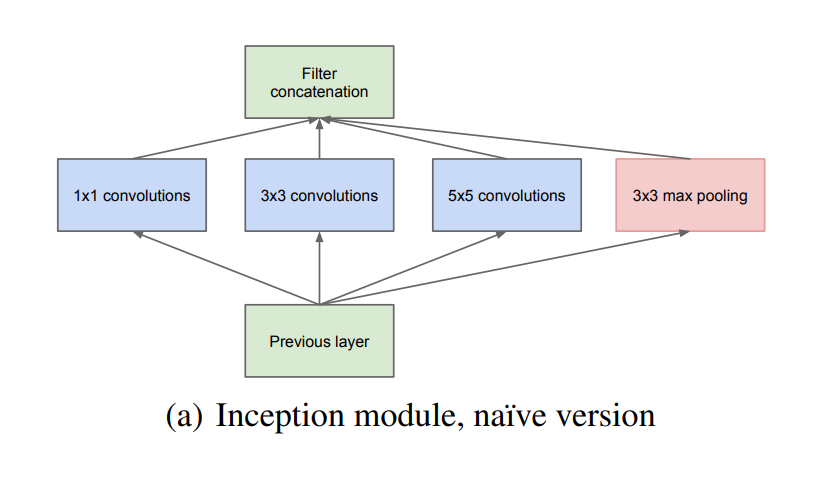

In [ ]:
def naive_module(X: np.array, n_kernel: list):
  """ X: input tensor
      n_filter: number of each conv layer's kernel
  """
  k1 ,k3, k5  = n_filter
  c1 = KL.Conv2D(filters = k1, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(X)
  c3 = KL.Conv2D(filters = k3, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(X)
  c5 = KL.Conv2D(filters = k5, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(X)
  mp = KL.MaxPool2D(pool_size = (3, 3), stride = 3)(X)
  concat = KL.Concatenate()([c1, c3, c5, mp])
  return concat

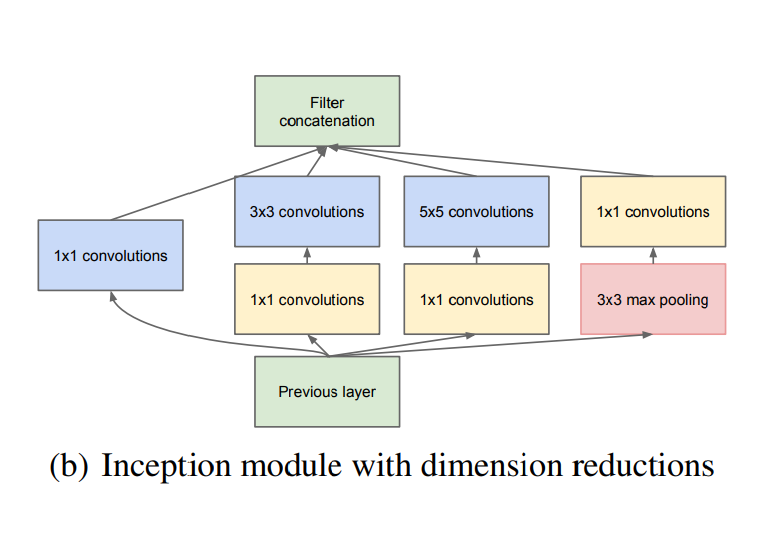

In [ ]:
def inception_v1(x, n_kernel):
  """ X: input tensor
      n_filter: number of each conv layer's kernel
  """
  k1, k3_1, k3, k5_1, k5 = n_kernel
  # X is input from previous layer
  c1 = KL.Conv2D(filters = k1, kernel_size = 1, padding = 'same', activation = 'relu')(X)
  c3 = KL.Conv2D(filters = k3_1, kernel_size = 1, padding = 'same', activation = 'relu')(X)
  c3 = KL.Conv2D(filters = k3, kernel_size = 3, padding = 'same', activation = 'relu')(c3)
  c5 = KL.Conv2D(filters = k5_1, kernel_size = 1, padding = 'same', activation = 'relu')(X)
  c5 = KL.Conv2D(filters = k5, kernel_size = 5, padding = 'same', activation = 'relu')(c5)
  mp = KL.MaxPool2D(pool_size = (3, 3), stride = 3)(X)
  mp = KL.Conv2D(filters = 5, kernel_size = 1, padding = 'valid')(mp)
  return KL.concatenate()([c1, c3, c5, mp])

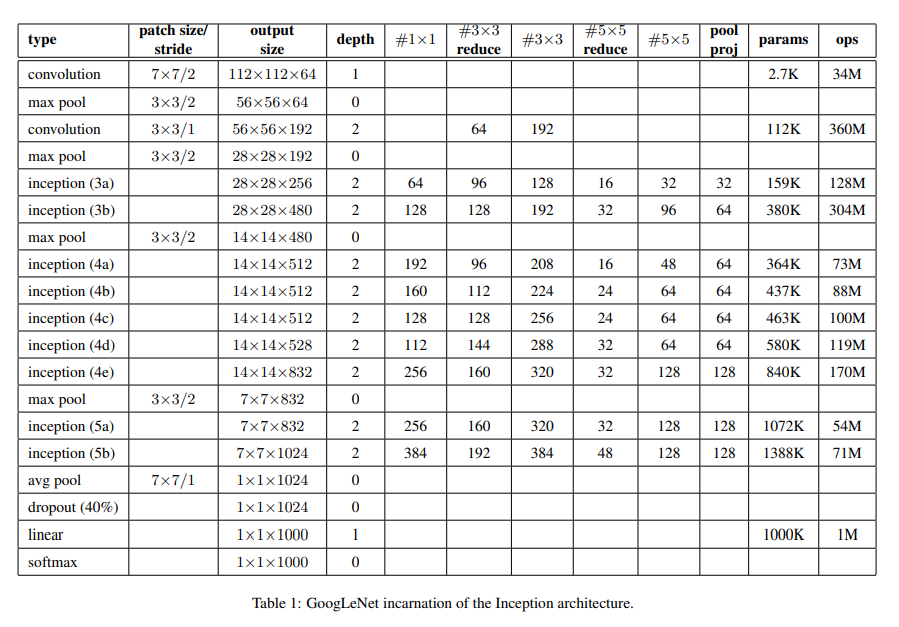

In [ ]:
class LocalResponseNormalization(tf.nn.local_response_normalization):
  def __init__(self):
    super().__init__()
    self.depth_radius = K
    self.bias = N
    self.alpha = alpha
    self.beta = beta

  def __call__(self, x):
    return tf.keras.layers.Lambda(lambda x: tf.nn.local_response_normalization(x, depth_radius = K, bias = N, alpha = self.alpha, beta = self.beta))

def inception(input_tensor, n_kernel: list):
  K1, K3_r, K3, K5_r, K5, P = n_kernel

  conv1 = KL.Conv2D(filters = K1, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(input_tensor)
  conv3 = KL.Conv2D(filters = K3_r, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(input_tensor)
  conv3 = KL.Conv2D(filters = K3, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(conv3)
  conv5 = KL.Conv2D(filters = K5_r, kernel_size = 1, strides = 1, padding = 'same', activation= 'relu')(input_tensor)
  conv5 = KL.Conv2D(filters = K5, kernel_size = 5, strides = 1, padding = 'same', activation= 'relu')(conv5)
  pool = KL.MaxPool2D(pool_size = (3, 3), strides = (3, 3))(input_tensor)
  pool = KL.Conc2D(filters = pooling, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(pool)
  
  return KL.concatinate()([conv1, conv3, conv5, pool])

def googleNet(input_tensor):
  x = KL.Conv2D(filters = 64, kernel_size = 7, stride = 2, padding = 'same', activation = 'relu')(input_tensor)
  x = KL.MaxPool2D(pool_size = (3, 3), strides = 2, padding = 'same')(x)
  LRN = LocalResponseNormalization()(x)

  x = KL.Conv2D(filters = 128, kernel_size = 1, strides = 1, padding = 'valid', activation = 'relu')(LRN)
  x = KL.Conv2D(filters = 192, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(x)
  x = KL.MaxPool2D(pool_size = (3, 3), strides = 2)(x)
  LRN = LocalResponseNormalization()(x)

  inception_3a = inception(LRN, [64, 96, 128, 16, 32, 32])
  inception_3b = inception(inception_3a, [128, 128, 192, 32, 96, 64])

  x = KL.MaxPool2D(pool_size = (3, 3), strides = 2)(inception_3b)
  inception_4a = inception(x, [192, 96, 208, 16, 48, 64])
  inception_4b = inception(inception_4a, [160, 112, 224, 24, 64, 64])
  inception_4c = inception(inception_4b, [128, 128, 256, 24, 64, 64])
  inception_4d = inception(inception_4c, [112, 144, 288, 32, 64, 64])
  inception_4e = inceoption(inception_4d, [256, 160, 320, 32, 128, 128])

  x = KL.MaxPool2D(pool_size = (3, 3), strides = 2)(inception_4d)
  inception_5a = inception(x, [256, 160, 320, 32, 128, 128])
  inception_5b = inception(inception_5a, [384, 192, 284, 48, 128, 128])

  x = KL.GlobalAveragePool(pool_size = (7, 7), strides = 1, padding = 'valid')(inception_5b)
  x = KL.Dropout(rate = 0.4)(x)
  x = KL.Dense(units = 1024, activation = 'relu')(x)
  x = KL.Dense(units = 1000, activation = 'softmax')(x)

  # aux network 1
  aux1 = KL.AveragePool2D(pool_size = (5, 5), stirdes = (3, 3), padding = 'valid')(inception_4a)
  aux1 = KL.Conv2D(filters = 128, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(aux1)
  aux1 = KL.Flatten()(aux2)
  aux1 = KL.Dense(units = 1024, activation = 'relu')(aux1)
  aux1 = KL.Dense(units = 1024, activation = 'relu')(aux1)
  aux1 = KL.Dense(units = 1000, activation = 'softmax')(aux1)
  
  # aux network 2
  aux2 = KL.AveragePool2D(pool_size = (5, 5), stirdes = (3, 3), padding = 'valid')(inception_4e)
  aux2 = KL.Conv2D(filters = 128, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(aux2)
  aux2 = KL.Flatten()(aux2)
  aux2 = KL.Dense(units = 1024, activation = 'relu')(aux2)
  aux2 = KL.Dense(units = 1024, activation = 'relu')(aux2)
  aux2 = KL.Dense(units = 1000, activation = 'softmax')(aux2)

  model = tf.keras.Model([x, aux1, aux2])

  return model


# To be passed to callbacks
class LRschedule(tf.keras.Callbacks):
  def on_epoch_end(self, epoch, logs = None):
    if (epoch+1) % 8 == 0:
      lr = K.get_value(self.model.optimizer.lr)
      K.set_value(self.model.optimizer.lr, lr * 0.96)